In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pandas_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
import missingno as msno
from sklearn.preprocessing import MinMaxScaler

In [99]:
df=pd.read_csv('training_data.csv')
df1=pd.read_csv('test_data.csv')

In [100]:
df['gender'].unique()

array(['male', 'female', 'Female', 'mAle'], dtype=object)

In [101]:
df['gender']=df['gender'].str.replace('Female','female')
df['gender']=df['gender'].str.replace('mAle','male')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient_id                   10000 non-null  int64  
 1   standard_lab_parameter_name  10000 non-null  object 
 2   parameter_value              10000 non-null  float64
 3   unit                         10000 non-null  object 
 4   created_at                   10000 non-null  object 
 5   reference_high               10000 non-null  float64
 6   reference_low                10000 non-null  float64
 7   age_group                    10000 non-null  object 
 8   gender                       10000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 703.2+ KB


In [103]:
df.describe()

,patient_id,parameter_value,reference_high,reference_low
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,356.897325,372.848728,162.951938
std,2886.89568,9289.389443,1800.575300,712.506331
min,0.00000,-71.000000,1.120000,0.000000
25%,2499.75000,6.700000,10.000000,4.000000
50%,4999.50000,8.830000,12.000000,4.500000
75%,7499.25000,101.000000,107.000000,98.000000
max,9999.00000,920000.000000,15000.000000,5000.000000


In [104]:
df.profile_report()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [105]:
df.isnull().sum()

patient_id                     0
standard_lab_parameter_name    0
parameter_value                0
unit                           0
created_at                     0
reference_high                 0
reference_low                  0
age_group                      0
gender                         0
dtype: int64

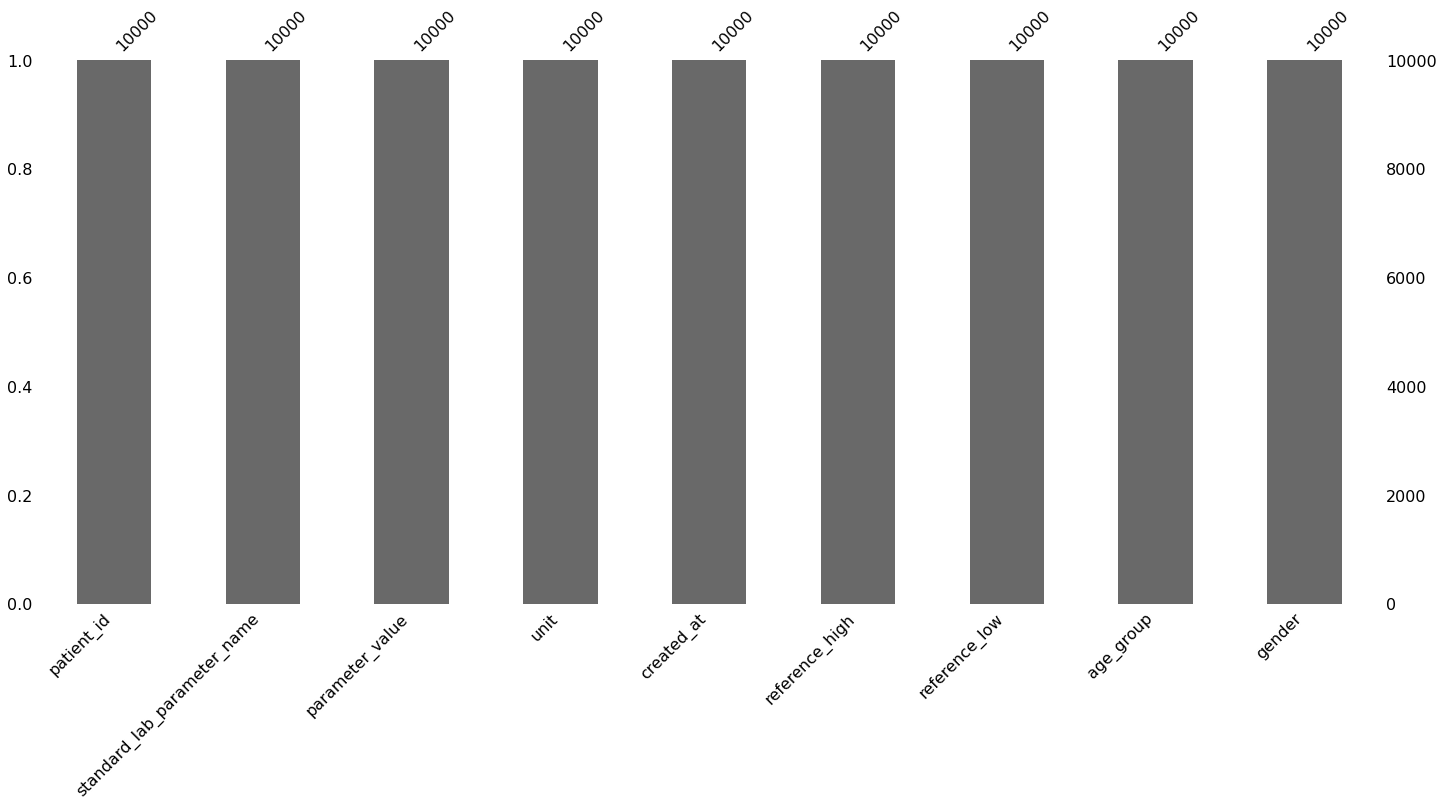

In [106]:

p=msno.bar(df)

/home/inder/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


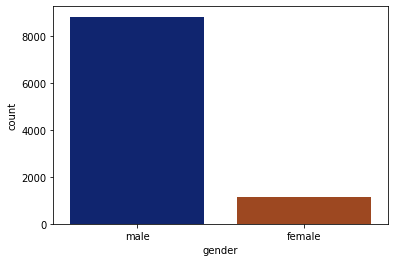

In [107]:
ax = sns.countplot('gender', data = df, palette = 'dark')

In [108]:
df['gender']=df['gender'].str.replace('Female','female')
df['gender']=df['gender'].str.replace('mAle','male')

/home/inder/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='standard_lab_parameter_name', ylabel='count'>

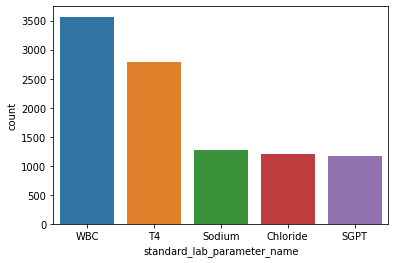

In [109]:
sns.countplot(df['standard_lab_parameter_name'])

/home/inder/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_group', ylabel='count'>

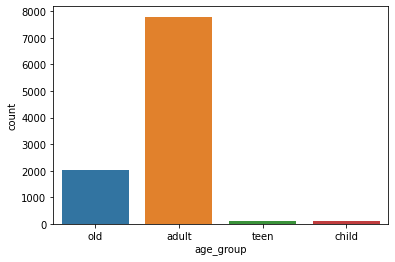

In [110]:
sns.countplot(df['age_group'])

In [111]:
df.head(5)

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group,gender
0,0,WBC,579.00,10^3/μl,2019-07-02 01:19:03.581,10.0,4.0,old,male
1,1,T4,5.00,μg/dl,2019-07-02 01:19:03.581,12.0,4.5,old,male
2,2,WBC,6.81,10^3/μl,2019-05-06 14:07:51.925,10.0,4.0,adult,male
3,3,T4,5.70,μg/dl,2019-05-06 14:07:51.925,12.0,4.5,adult,male
4,4,WBC,4.64,10^3/μl,2019-07-21 13:41:00.528523+00:00,10.0,4.0,adult,male


In [112]:
df1['age_group'].unique()

array(['adult', 'old', 'child', 'teen'], dtype=object)

In [113]:
s=df.loc[df.standard_lab_parameter_name=='WBC']
s['unit'].unique()

array(['10^3/μl', 'cells/μl', '10^3/μi', 'thou/mm3', 'cells/cumm',
       'thou/μl', '10^3/&micro;i', 'x 10³ / µl', 'cells/cum', '10^3/ul',
       'cells/cu.mm', '/cmm', '/cumm', 'cells/hpf', '103/μl', 'cells'],
      dtype=object)

In [114]:
###CHLORIDE ANALYSIS

In [115]:
Total_no_of_chloride_instances=df[df.standard_lab_parameter_name=='Chloride'].shape[0]
Total_instances=(df['patient_id'].shape[0])
Percentage_of_chloride=float((Total_no_of_chloride_instances/Total_instances))*100
print("Percentage of chloride instances in dataset -->" ,Percentage_of_chloride)

Percentage of chloride instances in dataset --> 11.959999999999999


/home/inder/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

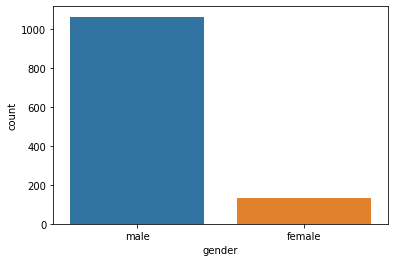

In [116]:
Chloride_data=df[df.standard_lab_parameter_name=='Chloride']
sns.countplot(Chloride_data['gender'])

In [117]:
Chloride_instances_with_adult=Chloride_data[Chloride_data.age_group=='adult'].shape[0]
Total_percentage_chloride_with_adult_group=(float(Chloride_instances_with_adult/Total_instances))*100
print("Total percentage of people having chloride and belongs to adult group-->",Total_percentage_chloride_with_adult_group)

Chloride_instances_with_old=Chloride_data[Chloride_data.age_group=='old'].shape[0]
Total_percentage_chloride_with_old_group=(float(Chloride_instances_with_old/Total_instances))*100
print("Total percentage of people having chloride and belongs to old group-->",Total_percentage_chloride_with_old_group)

Chloride_instances_with_teen=Chloride_data[Chloride_data.age_group=='teen'].shape[0]
Total_percentage_chloride_with_teen_group=(float(Chloride_instances_with_teen/Total_instances))*100
print("Total percentage of people having chloride and belongs to teen group-->",Total_percentage_chloride_with_teen_group)

Chloride_instances_with_child=Chloride_data[Chloride_data.age_group=='child'].shape[0]
Total_percentage_chloride_with_child_group=(float(Chloride_instances_with_child/Total_instances))*100
print("Total percentage of people having chloride and belongs to child group-->",Total_percentage_chloride_with_child_group)

Total percentage of people having chloride and belongs to adult group--> 9.25
Total percentage of people having chloride and belongs to old group--> 2.46
Total percentage of people having chloride and belongs to teen group--> 0.13999999999999999
Total percentage of people having chloride and belongs to child group--> 0.11


/home/inder/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_group', ylabel='count'>

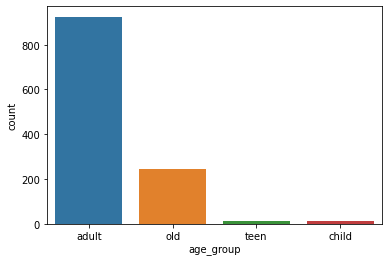

In [118]:
sns.countplot(Chloride_data['age_group'])

/home/inder/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

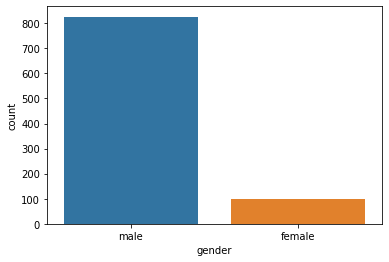

In [119]:
adult=Chloride_data.loc[(Chloride_data.age_group=='adult')]
sns.countplot(adult['gender'])

/home/inder/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

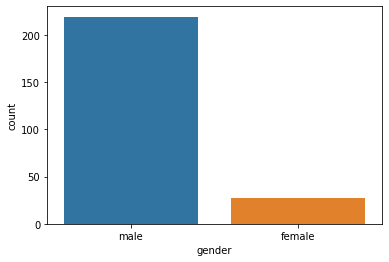

In [120]:
old=Chloride_data.loc[(Chloride_data.age_group=='old')]
sns.countplot(old['gender'])

/home/inder/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

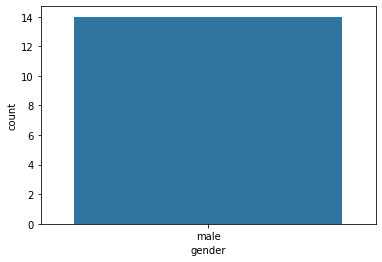

In [121]:
teen=Chloride_data.loc[(Chloride_data.age_group=='teen')]
sns.countplot(teen['gender'])

/home/inder/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

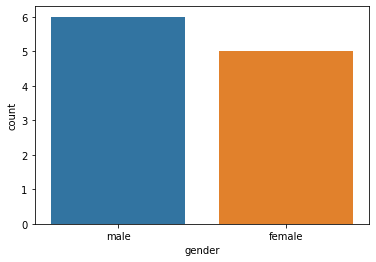

In [122]:
child=Chloride_data.loc[(Chloride_data.age_group=='child')]
sns.countplot(child['gender'])

In [123]:
old_df=df.loc[(df.age_group=='old') & (df.standard_lab_parameter_name=='Chloride')]
old_df

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group,gender
23,23,Chloride,106.5,mmol/l,2019-01-26 05:37:04.917295+00:00,109.0,99.0,old,male
46,46,Chloride,101.9,mmol/l,2019-06-05 09:28:52.365281+00:00,109.0,101.0,old,male
93,93,Chloride,104.5,mmol/l,2019-08-27 07:44:08.355024+00:00,107.0,98.0,old,male
164,164,Chloride,9890.0,mmol/l,2019-10-18 08:21:50.709787+00:00,108.0,98.0,old,male
171,171,Chloride,100.0,mmol/l,2019-10-14 12:16:11.120338+00:00,107.0,98.0,old,male
...,...,...,...,...,...,...,...,...,...
9873,9873,Chloride,104.0,meq/l,2019-09-14 15:34:05.483383+00:00,109.0,101.0,old,male
9877,9877,Chloride,100.0,mmol/l,2019-11-28 17:03:32.770539+00:00,107.0,98.0,old,male
9898,9898,Chloride,102.7,mmol/l,2019-09-07 16:24:40.672031+00:00,107.0,98.0,old,male
9905,9905,Chloride,98.8,mmol/l,2019-09-12 02:00:07.921807+00:00,107.0,98.0,old,male


/home/inder/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

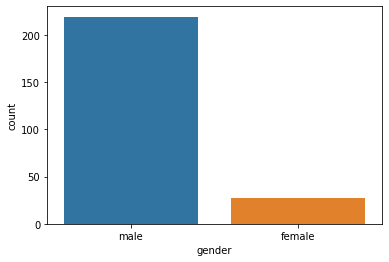

In [124]:
sns.countplot(old_df['gender'])

CHROLIDE ANALYSIS FOR TESTING DATA

/home/inder/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_group', ylabel='count'>

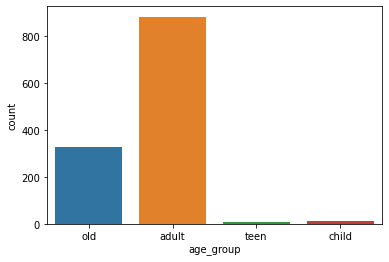

In [125]:
Chloride_data_test=df1[df1.standard_lab_parameter_name=='Chloride']
sns.countplot(Chloride_data_test['age_group'])

In [126]:
total_instances_test=df1['patient_id'].shape[0]
total_instances_test

10000

In [127]:
Chloride_instances_with_adult=Chloride_data_test[Chloride_data_test.age_group=='adult'].shape[0]
Total_percentage_chloride_with_adult_group=(float(Chloride_instances_with_adult/total_instances_test))*100
print("Total percentage of people having chloride and belongs to adult group in 2020-->",Total_percentage_chloride_with_adult_group)

Chloride_instances_with_old=Chloride_data_test[Chloride_data_test.age_group=='old'].shape[0]
Total_percentage_chloride_with_old_group=(float(Chloride_instances_with_old/total_instances_test))*100
print("Total percentage of people having chloride and belongs to old group in 2020-->",Total_percentage_chloride_with_old_group)

Chloride_instances_with_teen=Chloride_data_test[Chloride_data_test.age_group=='teen'].shape[0]
Total_percentage_chloride_with_teen_group=(float(Chloride_instances_with_teen/total_instances_test))*100
print("Total percentage of people having chloride and belongs to teen group in 2020-->",Total_percentage_chloride_with_teen_group)

Chloride_instances_with_child=Chloride_data_test[Chloride_data_test.age_group=='child'].shape[0]
Total_percentage_chloride_with_child_group=(float(Chloride_instances_with_child/total_instances_test))*100
print("Total percentage of people having chloride and belongs to child group in 2020-->",Total_percentage_chloride_with_child_group)

Total percentage of people having chloride and belongs to adult group in 2020--> 8.83
Total percentage of people having chloride and belongs to old group in 2020--> 3.27
Total percentage of people having chloride and belongs to teen group in 2020--> 0.09
Total percentage of people having chloride and belongs to child group in 2020--> 0.12


In [128]:
df.drop(['created_at'],axis=1,inplace=True)
df1.drop(['created_at'],axis=1,inplace=True)


In [129]:
df

,patient_id,standard_lab_parameter_name,parameter_value,unit,reference_high,reference_low,age_group,gender
0,0,WBC,579.00,10^3/μl,10.0,4.0,old,male
1,1,T4,5.00,μg/dl,12.0,4.5,old,male
2,2,WBC,6.81,10^3/μl,10.0,4.0,adult,male
3,3,T4,5.70,μg/dl,12.0,4.5,adult,male
4,4,WBC,4.64,10^3/μl,10.0,4.0,adult,male
...,...,...,...,...,...,...,...,...
9995,9995,WBC,9.14,10^3/μl,10.0,4.0,adult,male
9996,9996,WBC,4.90,thou/mm3,10.0,4.0,adult,male
9997,9997,T4,9.80,μg/dl,12.0,4.5,old,male
9998,9998,WBC,4.93,10^3/μl,10.0,4.0,old,male


In [130]:
df1

,Unnamed: 0,patient_id,standard_lab_parameter_name,parameter_value,unit,reference_high,reference_low,age_group
0,0,0,WBC,8.10,10^3/μl,10.0,4.0,adult
1,1,1,T4,13.00,μg/dl,12.0,4.5,adult
2,2,2,T4,7.10,μg/dl,12.0,4.5,adult
3,3,3,WBC,5.62,10^3/μl,10.0,4.0,adult
4,4,4,WBC,9350.00,/cmm,10000.0,4000.0,old
...,...,...,...,...,...,...,...,...
9995,9995,9995,SGPT,14.00,u/l,55.0,0.0,adult
9996,9996,9996,Sodium,135.00,mmol/l,145.0,135.0,adult
9997,9997,9997,Chloride,102.00,mmol/l,108.0,98.0,adult
9998,9998,9998,WBC,6.00,10^3/μi,10.0,4.0,adult


In [131]:
le = LabelEncoder()
df['standard_lab_parameter_name']=le.fit_transform(df['standard_lab_parameter_name'])
df['gender']=le.fit_transform(df['gender'])
df['unit']=le.fit_transform(df['unit'])
df1['standard_lab_parameter_name']=le.fit_transform(df1['standard_lab_parameter_name'])
df1['unit']=le.fit_transform(df1['unit'])


In [132]:
df

,patient_id,standard_lab_parameter_name,parameter_value,unit,reference_high,reference_low,age_group,gender
0,0,4,579.00,7,10.0,4.0,old,1
1,1,3,5.00,28,12.0,4.5,old,1
2,2,4,6.81,7,10.0,4.0,adult,1
3,3,3,5.70,28,12.0,4.5,adult,1
4,4,4,4.64,7,10.0,4.0,adult,1
...,...,...,...,...,...,...,...,...
9995,9995,4,9.14,7,10.0,4.0,adult,1
9996,9996,4,4.90,22,10.0,4.0,adult,1
9997,9997,3,9.80,28,12.0,4.5,old,1
9998,9998,4,4.93,7,10.0,4.0,old,1


In [133]:
df1

,Unnamed: 0,patient_id,standard_lab_parameter_name,parameter_value,unit,reference_high,reference_low,age_group
0,0,0,4,8.10,5,10.0,4.0,adult
1,1,1,3,13.00,20,12.0,4.5,adult
2,2,2,3,7.10,20,12.0,4.5,adult
3,3,3,4,5.62,5,10.0,4.0,adult
4,4,4,4,9350.00,0,10000.0,4000.0,old
...,...,...,...,...,...,...,...,...
9995,9995,9995,1,14.00,18,55.0,0.0,adult
9996,9996,9996,2,135.00,12,145.0,135.0,adult
9997,9997,9997,0,102.00,12,108.0,98.0,adult
9998,9998,9998,4,6.00,4,10.0,4.0,adult


In [134]:
df['age_group']=le.fit_transform(df['age_group'])
df1['age_group']=le.fit_transform(df1['age_group'])
df

,patient_id,standard_lab_parameter_name,parameter_value,unit,reference_high,reference_low,age_group,gender
0,0,4,579.00,7,10.0,4.0,2,1
1,1,3,5.00,28,12.0,4.5,2,1
2,2,4,6.81,7,10.0,4.0,0,1
3,3,3,5.70,28,12.0,4.5,0,1
4,4,4,4.64,7,10.0,4.0,0,1
...,...,...,...,...,...,...,...,...
9995,9995,4,9.14,7,10.0,4.0,0,1
9996,9996,4,4.90,22,10.0,4.0,0,1
9997,9997,3,9.80,28,12.0,4.5,2,1
9998,9998,4,4.93,7,10.0,4.0,2,1


In [135]:
df_cpy=df
df_cpy=df.drop(['patient_id','unit'],axis=1)
df_cpy

,standard_lab_parameter_name,parameter_value,reference_high,reference_low,age_group,gender
0,4,579.00,10.0,4.0,2,1
1,3,5.00,12.0,4.5,2,1
2,4,6.81,10.0,4.0,0,1
3,3,5.70,12.0,4.5,0,1
4,4,4.64,10.0,4.0,0,1
...,...,...,...,...,...,...
9995,4,9.14,10.0,4.0,0,1
9996,4,4.90,10.0,4.0,0,1
9997,3,9.80,12.0,4.5,2,1
9998,4,4.93,10.0,4.0,2,1


In [136]:
df=df_cpy
df

,standard_lab_parameter_name,parameter_value,reference_high,reference_low,age_group,gender
0,4,579.00,10.0,4.0,2,1
1,3,5.00,12.0,4.5,2,1
2,4,6.81,10.0,4.0,0,1
3,3,5.70,12.0,4.5,0,1
4,4,4.64,10.0,4.0,0,1
...,...,...,...,...,...,...
9995,4,9.14,10.0,4.0,0,1
9996,4,4.90,10.0,4.0,0,1
9997,3,9.80,12.0,4.5,2,1
9998,4,4.93,10.0,4.0,2,1


In [137]:
df2=df1
df2=df1.drop(['Unnamed: 0','patient_id','unit'],axis=1)
df2

,standard_lab_parameter_name,parameter_value,reference_high,reference_low,age_group
0,4,8.10,10.0,4.0,0
1,3,13.00,12.0,4.5,0
2,3,7.10,12.0,4.5,0
3,4,5.62,10.0,4.0,0
4,4,9350.00,10000.0,4000.0,2
...,...,...,...,...,...
9995,1,14.00,55.0,0.0,0
9996,2,135.00,145.0,135.0,0
9997,0,102.00,108.0,98.0,0
9998,4,6.00,10.0,4.0,0


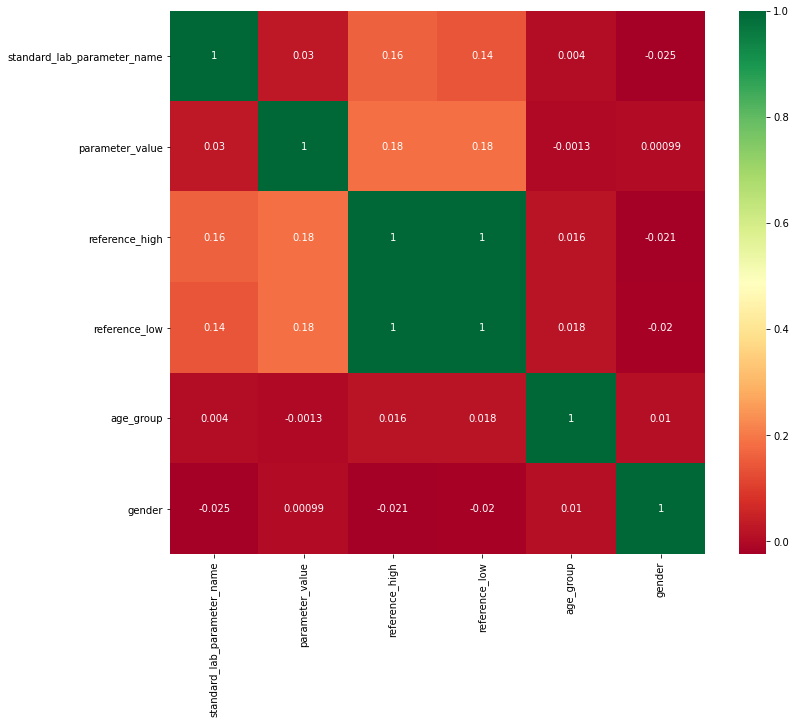

In [138]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn') 

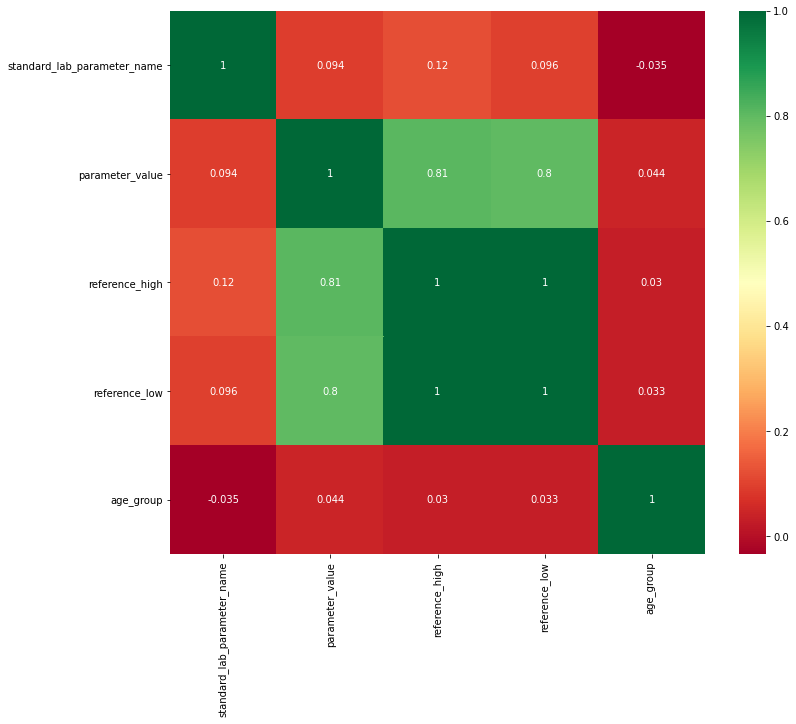

In [139]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df2.corr(), annot=True,cmap ='RdYlGn') 

In [140]:
df3=df2
df3=df2.drop(['reference_low'],axis=1)
df3

,standard_lab_parameter_name,parameter_value,reference_high,age_group
0,4,8.10,10.0,0
1,3,13.00,12.0,0
2,3,7.10,12.0,0
3,4,5.62,10.0,0
4,4,9350.00,10000.0,2
...,...,...,...,...
9995,1,14.00,55.0,0
9996,2,135.00,145.0,0
9997,0,102.00,108.0,0
9998,4,6.00,10.0,0


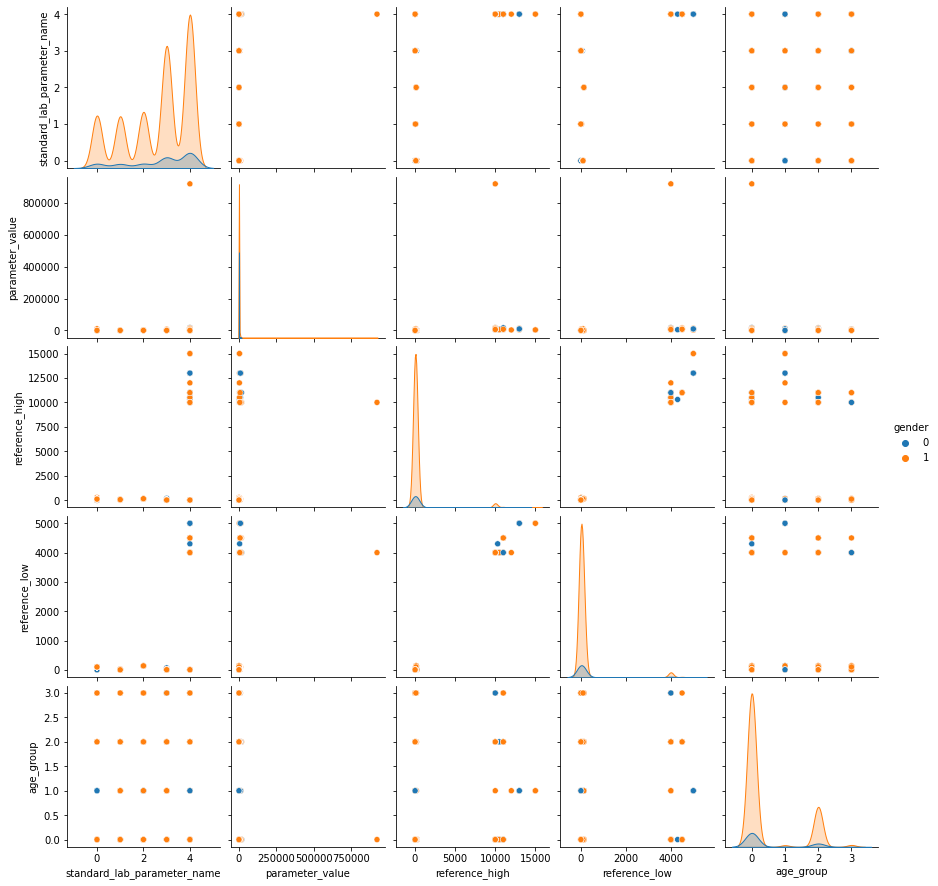

In [141]:
p=sns.pairplot(df, hue = 'gender')

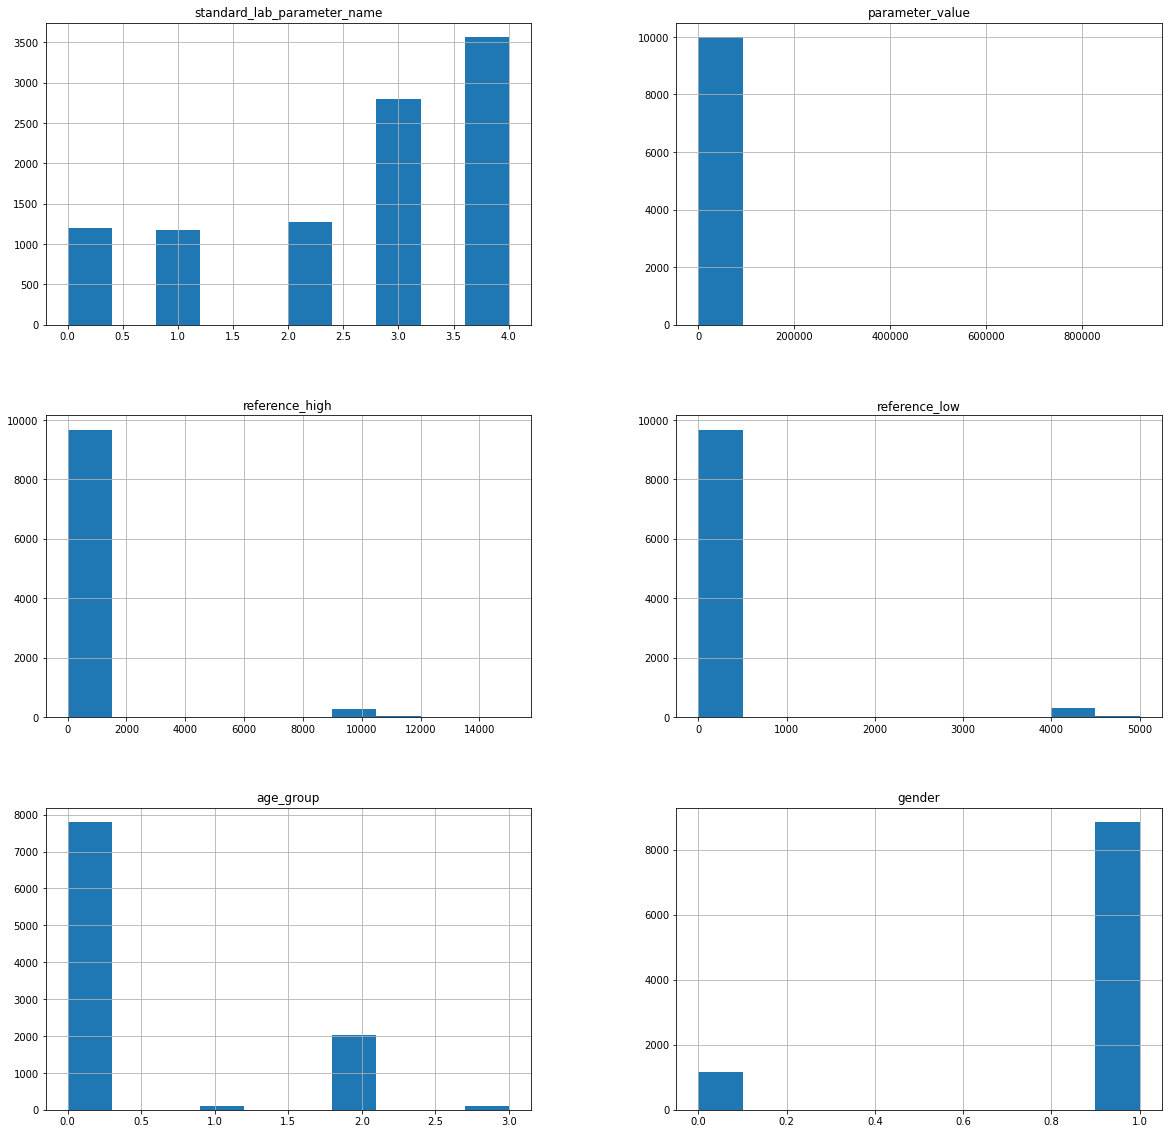

In [142]:
p=df.hist(figsize=(20,20))

In [143]:
df

,standard_lab_parameter_name,parameter_value,reference_high,reference_low,age_group,gender
0,4,579.00,10.0,4.0,2,1
1,3,5.00,12.0,4.5,2,1
2,4,6.81,10.0,4.0,0,1
3,3,5.70,12.0,4.5,0,1
4,4,4.64,10.0,4.0,0,1
...,...,...,...,...,...,...
9995,4,9.14,10.0,4.0,0,1
9996,4,4.90,10.0,4.0,0,1
9997,3,9.80,12.0,4.5,2,1
9998,4,4.93,10.0,4.0,2,1


In [144]:
male=df[df['gender']==1]
female=df[df['gender']==0]


In [145]:
print(male.shape,female.shape)

(8842, 6) (1158, 6)


In [146]:
Y=df['gender']
Y=pd.DataFrame(Y)
Y

,gender
0,1
1,1
2,1
3,1
4,1
...,...
9995,1
9996,1
9997,1
9998,1


In [147]:
X1=df.drop(['gender','reference_low'],axis=1)
X1

,standard_lab_parameter_name,parameter_value,reference_high,age_group
0,4,579.00,10.0,2
1,3,5.00,12.0,2
2,4,6.81,10.0,0
3,3,5.70,12.0,0
4,4,4.64,10.0,0
...,...,...,...,...
9995,4,9.14,10.0,0
9996,4,4.90,10.0,0
9997,3,9.80,12.0,2
9998,4,4.93,10.0,2


In [148]:
X1

,standard_lab_parameter_name,parameter_value,reference_high,age_group
0,4,579.00,10.0,2
1,3,5.00,12.0,2
2,4,6.81,10.0,0
3,3,5.70,12.0,0
4,4,4.64,10.0,0
...,...,...,...,...
9995,4,9.14,10.0,0
9996,4,4.90,10.0,0
9997,3,9.80,12.0,2
9998,4,4.93,10.0,2


In [149]:
from imblearn.under_sampling import NearMiss 

In [150]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_resample(X1,Y)


In [151]:
X_res.shape,y_res.shape

((2316, 4), (2316, 1))

/home/inder/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

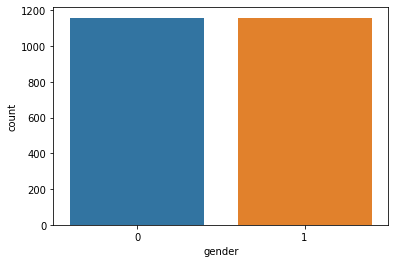

In [152]:
sns.countplot(y_res['gender'])

In [153]:
from sklearn.ensemble import RandomForestClassifier


In [154]:
clf = RandomForestClassifier(criterion = 'entropy',n_estimators=31,max_depth=4)  

In [155]:
clf.fit(X_res,y_res)

<ipython-input-155-98c6850ae196>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_res,y_res)


RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=31)

In [156]:
s=clf.predict(df3)

In [157]:

s=pd.DataFrame(s)
s

,0
0,1
1,0
2,1
3,1
4,0
...,...
9995,0
9996,1
9997,1
9998,1


/home/inder/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='count'>

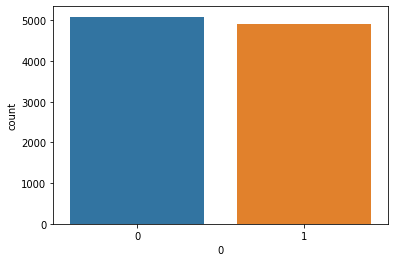

In [158]:
sns.countplot(s[0])

In [159]:
s[0].value_counts()

0    5088
1    4912
Name: 0, dtype: int64

In [62]:
print("The accuracy is--->",clf.score(df3,s))

The accuracy is---> 1.0
